# Homework_2022_04_18

本次作业共10分，<font color=ff0000> 截止日期 4.22 23:59。</font>


## 一、膨胀与腐蚀(2')
膨胀与腐蚀是常见的图像预处理手段，本题请读入erode_dilate.jpg，并对其进行灰度化、二值化，然后基于OpenCV对图像连续进行膨胀和腐蚀操作（即“闭运算”）。

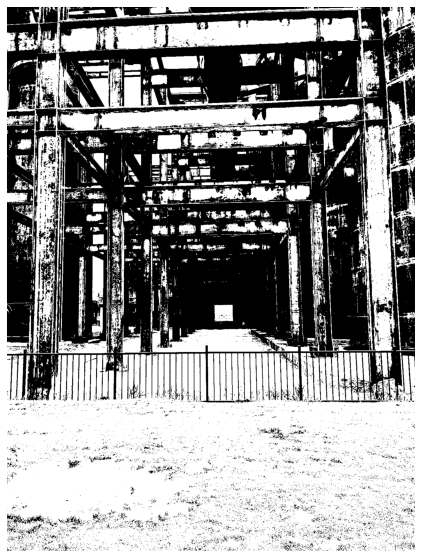

In [1]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt
%matplotlib inline
img = cv.imread('erode_dilate.jpg')
gray_img = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
_, binary_img = cv.threshold(gray_img, 100, 255, cv.THRESH_BINARY)
plt.figure(figsize=(16, 10))
plt.axis('off')
plt.imshow(binary_img, plt.cm.gray)

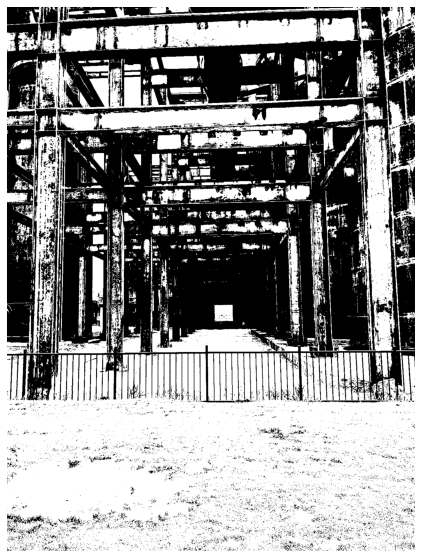

In [2]:
# TODO cv.erode() & cv.dilate()
# kernel大小可以自己决定，因此结果未必要和示例图片完全一致
kernel=np.ones((3,3))
for i in range(3):
    img=cv.erode(img,kernel,iterations=2)
    img=cv.dilate(img,kernel,iterations=2)
plt.figure(figsize=(16,10))
plt.axis('off')
plt.imshow(binary_img,cmap='gray')

## 二、Hough算法直线检测(2')
Hough算法可以用于图片中直线或椭圆、圆等形状的检测，本题我们对这种算法进行简单的应用。请对Hough.jpg**首先进行边缘检测**，再应用Hough算法，**画出Hough算法检测出的直线**，阈值可自行设定。

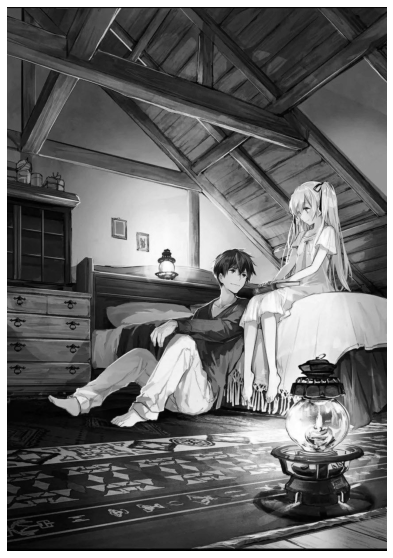

In [3]:
from skimage import transform as st
from skimage import data,feature,io,color

img = color.rgb2gray(io.imread('Hough.jpg'))
plt.figure(figsize=(16,10))
plt.axis('off')
plt.imshow(img,cmap='gray')

((467, 1224), (856, 1224))


(-41.75, 898.75, -59.1, 1285.1)

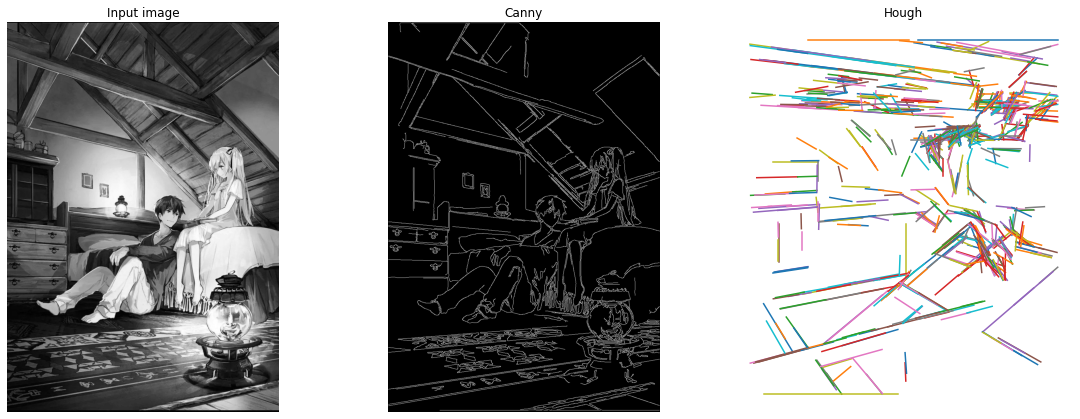

In [4]:
fig, (ax0, ax1, ax2) = plt.subplots(1, 3, figsize=(16, 6))
plt.tight_layout()


ax0.imshow(img, plt.cm.gray)
ax0.set_title('Input image')
ax0.set_axis_off()

img2=feature.canny(image=img,sigma=1,low_threshold=0.2,high_threshold=0.9)
ax1.imshow(img2,cmap='gray')
ax1.set_title('Canny')
ax1.axis('off')

lines=st.probabilistic_hough_line(img2,threshold=10)
print(lines[0])
for line in lines:
    ax2.plot(*zip(*line))
ax2.set_title('Hough')
ax2.axis('off')
# TODO

#在ax1中画出canny边缘(e.g. feature.canny())

#利用Hough算法(e.g. st.probabilistic_hough_line())检测并在ax2中画出所有的直线，阈值可以自己设置，不一定与示例图片相同

## 三、离散余弦变换(3')
课上我们学习了离散余弦变换，其最广泛的应用在图片压缩领域；但基于人们对高频信息和低频信息的敏感度区别，离散余弦变换也可以用来实现数字水印、图片加密等等功能。opencv中的cv.dct()&cv.idct()功能可以方便地实现离散余弦变换及逆变换，**如果我们将图片B的频域信息覆盖在图片A的高频部分，一方面图中已经包含了足以重建图片B的信息，另一方面改写高频部分对原图看上去并不会有太大的改观，从而实现“隐藏”了图片B**。

本题所提供的lena_and_more.png看上去是那张最经典的Lena照片，但实际上我在里面藏了另一幅照片，**请从频域信息中提取并重建这幅照片**。

请注意，三个颜色通道都需要进行类似的操作；为简便起见，本题对全图整体进行DCT，不需要额外分割；隐藏图片的大小为256\*256；本题不提供示例输出（否则就不算隐藏了x）。

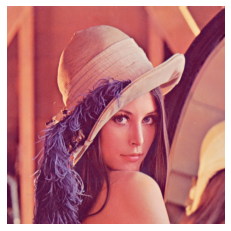

In [5]:
img = cv.cvtColor(cv.imread('lena_and_more.png'), cv.COLOR_BGR2RGB)
plt.axis('off')
plt.imshow(img)
r=img[:,:,0]
g=img[:,:,1]
b=img[:,:,2]
# TODO
# 提示：完成DCT后哪个区域被修改对原图影响最小？

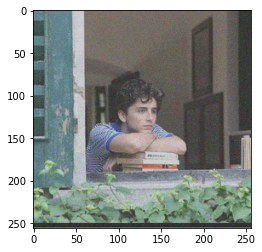

In [6]:
matr=cv.dct(r.astype('float32'))
matg=cv.dct(g.astype('float32'))
matb=cv.dct(b.astype('float32'))
new_buildr=cv.idct(matr[256:,256:])
new_buildg=cv.idct(matg[256:,256:])
new_buildb=cv.idct(matb[256:,256:])
new_build=cv.merge((new_buildr,new_buildg,new_buildb))
new_build=(new_build+2)/10
plt.imshow(new_build)

## 四、Seam Carving(3')
Seam Carving可以实现图片的剪裁，而又不会更改图中重点物体的形状。本题我们实现对SC.jpg的剪裁，请**在纵向截去150个像素**，展现Seam Carving后的结果。

以下代码框架可供参考，也可自行更改。

Total cost:75.85269856452942s


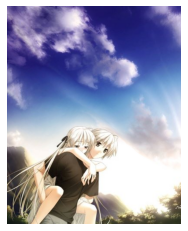

In [7]:
import time
from tqdm import trange

def energy_map(Image):
    r,g,b=cv.split(Image)
    Gr=np.gradient(r)
    Gg=np.gradient(g)
    Gb=np.gradient(b)
    G=np.abs(Gr[0])+np.abs(Gg[0])+np.abs(Gb[0])+np.abs(Gr[1])+np.abs(Gg[1])+np.abs(Gb[1])
    return G
    
    # 计算能量
    # 对三通道分别计算横向和纵向梯度值
    # 返回值：三通道相加得到的总能量


def find_seam(energy):
    R,C=energy.shape
    for i in range(1,R):
        for j in range(C):
            if j==0:
                energy[i][j]=min(energy[i-1][j:j+2])+energy[i][j]
            elif j==C-1:
                energy[i][j]=min(energy[i-1][j-1:j+1])+energy[i][j]
            else:
                energy[i][j]=min(energy[i-1][j-1:j+2])+energy[i][j]
    j=np.argmin(energy[-1])
    path=[j]
    for i in range(R-1,0,-1):
        if j==0:
            j+=np.argmin(energy[i-1,j:j+2])-1
        elif j==C-1:
            j+=np.argmin(energy[i-1,j-1:j+1])-1
        else:
            j+=np.argmin(energy[i-1,j-1:j+2])-1
        path.append(j)
    path.reverse()
    return min(energy[-1]),np.array(path)
    # 动态规划求最小能量路径
    # 返回值：能量，seam路径


def delete_seam(Image, seam):
    H,W,C=Image.shape
    for i in range(H):
        if i!= W-1:
            Image[i,seam[i]:-1]=Image[i,seam[i]+1:]
    return Image[:,:-1]
    # 逐行删除对应能量值最小的像素点
    # 返回值：完成一次删除的图像


def seam_carving(Image, delta):
    for i in range(delta):
        G=energy_map(Image)
        E,path=find_seam(G)
        Image=delete_seam(Image,path)
    return Image
    # 循环多次剪切
    # 每个循环的内容：先计算能量，再找到seam路径，然后删除路径上的像素点
    # Image传入图像，delta为需要剪切的像素数，本题中为150
    # 返回值：seam carving后的图像

    
img=cv.cvtColor(cv.imread('SC.jpg'),cv.COLOR_BGR2RGB)
r,g,b=cv.split(img)
img=cv.merge((r.T,g.T,b.T))
import time
start_time=time.time()
imgcarv=seam_carving(img,150)
print(f'Total cost:{time.time()-start_time}s')

r,g,b=cv.split(imgcarv)
imgcarv=cv.merge((r.T,g.T,b.T))
plt.axis('off')
plt.imshow(imgcarv)

# 读取SC.jpg并完成seam_carving，请注意剪裁方向为纵向

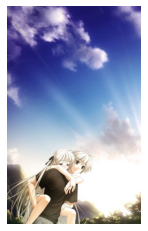

In [8]:
img=cv.cvtColor(cv.imread('SC.jpg'),cv.COLOR_BGR2RGB)
plt.axis('off')
plt.imshow(img)